In [1]:
import ROOT as rt
import array as arr
import math

from strangehelper import get_parabola, make_mixed_corrections

Welcome to JupyROOT 6.24/06


In [2]:
# epsilon used to avoid bin edge nightmares (if you pick a value that lies on bin edge, it defaults to right bin)
EPSILON = 0.00001

In [3]:
# decide whether to do sideband subtraction or not
DO_SIDEBAND_SUBTRACTION = False

In [4]:
# set if correlation distribution uses MC kinematics (instead of reconstructed kinematics)
USE_MC_KINEMATICS = False

In [5]:
# UE line method
USE_AVG = 1
USE_ZYAM = 0
USE_NONEG = 0
assert sum([USE_AVG, USE_ZYAM, USE_NONEG]) == 1, "Only select 1 method for UE line please"

In [6]:
# ETA CUTS
ETA_MIN = -0.8
ETA_MAX = 0.8 - EPSILON
DELTA_ETA_MIN = -1.2
DELTA_ETA_MAX = 1.2 - EPSILON 

In [7]:
# PT CUTS
TRIG_PT_LOW = 4 
TRIG_PT_HIGH = 8 - EPSILON
ASSOC_PT_LOW = 2
ASSOC_PT_HIGH = 4 - EPSILON

In [8]:
# SIGNAL AND SIDEBAND REGION CUTS
SIG_MIN = 1.10 
SIG_MAX = 1.134 - EPSILON
RSB_MIN = 1.22
RSB_MAX = 1.26 - EPSILON

In [9]:
c = rt.TCanvas("main_canvas", "Main Canvas", 55, 55, 800, 600)

In [10]:
# input_file = rt.TFile("../online/closure/v0/AnalysisResults.root")
input_file = rt.TFile("../online/closure/v0/output/cent_0_80_hdaughter_motherpt.root")
input_list = input_file.Get("h-lambda")

In [11]:
trig_dist = input_list.FindObject("fTriggerDistEff_checkMC")
lambda_dist = input_list.FindObject("fTriggeredLambdaDist")
# lambda_ls_dist = input_list.FindObject("fTriggeredLambdaLSDist")
lambda_ls_dist = input_list.FindObject("fTriggeredLambdaDist")
trig_dist_mc = input_list.FindObject("fTriggerDist_MC")
lambda_dist_mc = input_list.FindObject("fTriggeredLambdaDist_MC")

In [12]:
h_h = input_list.FindObject("fDphiHHEff_checkMC")
h_h_mixed = input_list.FindObject("fDphiHHMixed")
h_h_mc = input_list.FindObject("fDphiHH_MC")
h_h_mixed_mc = input_list.FindObject("fDphiHHMixed_MC")

In [13]:
h_lambda = input_list.FindObject("fDphiHLambdaEff")
h_lambda_mixed = input_list.FindObject("fDphiHLambdaMixed")
h_lambda_mc = input_list.FindObject("fDphiHLambda_MC")
h_lambda_mixed_mc = input_list.FindObject("fDphiHLambdaMixed_MC")

In [14]:
# Setting the trigger Pt (this is never changed again)
trig_dist.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_h.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_h_mixed.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_lambda.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_lambda_mixed.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
trig_dist_mc.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_h_mc.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_h_mixed_mc.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_lambda_mc.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_lambda_mixed_mc.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)

In [15]:
# Setting the associated Pt (this is never changed again)
lambda_dist.GetAxis(0).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
lambda_ls_dist.GetAxis(0).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_h.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_h_mixed.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_lambda.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_lambda_mixed.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
lambda_dist_mc.GetAxis(0).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_h_mc.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_h_mixed_mc.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_lambda_mc.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_lambda_mixed_mc.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)

In [16]:
trig_dist.GetAxis(2).SetRangeUser(ETA_MIN, ETA_MAX)
trig_dist_mc.GetAxis(2).SetRangeUser(ETA_MIN, ETA_MAX)
lambda_dist.GetAxis(2).SetRangeUser(ETA_MIN, ETA_MAX)
lambda_ls_dist.GetAxis(2).SetRangeUser(ETA_MIN, ETA_MAX)

In [17]:
trig_pt_dist = trig_dist.Projection(0).Clone("trig_pt_dist")
trig_phi_dist = trig_dist.Projection(1).Clone("trig_phi_dist")
trig_eta_dist = trig_dist.Projection(2).Clone("trig_eta_dist")
trig_2d_dist = trig_dist.Projection(0, 3).Clone("trig_2d_dist")

trig_pt_dist.SetTitle("Trigger #font[12]{p}_{T} Distribution (red: reconstruced, blue: MC truth)")
trig_pt_dist.Sumw2()
trig_pt_dist.SetLineColor(rt.kRed)

trig_phi_dist.SetTitle("Trigger #varphi Distribution (red: reconstructed, blue: MC truth")
trig_phi_dist.Sumw2()
trig_phi_dist.SetLineColor(rt.kRed)

trig_eta_dist.SetTitle("Trigger #eta Distribution (red: reconstructed, blue: MC truth")
trig_eta_dist.Sumw2()
trig_eta_dist.SetLineColor(rt.kRed)

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [18]:
trig_pt_dist_mc = trig_dist_mc.Projection(0).Clone("trig_pt_dist_mc")
trig_phi_dist_mc = trig_dist_mc.Projection(1).Clone("trig_phi_dist_mc")
trig_eta_dist_mc = trig_dist_mc.Projection(2).Clone("trig_eta_dist_mc")
trig_2d_dist_mc = trig_dist_mc.Projection(0, 3).Clone("trig_2d_dist_mc")

trig_pt_dist_mc.SetTitle("Trigger #font[12]{p}_{T} Distribution (red: reconstruced, blue: MC truth)")
trig_pt_dist_mc.Sumw2()
trig_pt_dist_mc.SetLineColor(rt.kBlue)

trig_phi_dist_mc.SetTitle("Trigger #varphi Distribution (red: reconstructed, blue: MC truth")
trig_phi_dist_mc.Sumw2()
trig_phi_dist_mc.SetLineColor(rt.kBlue)

trig_eta_dist_mc.SetTitle("Trigger #eta Distribution (red: reconstructed, blue: MC truth")
trig_eta_dist_mc.Sumw2()
trig_eta_dist_mc.SetLineColor(rt.kBlue)

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [19]:
num_trigs = trig_2d_dist.Integral()
num_trigs_mc = trig_2d_dist_mc.Integral()

In [20]:
trig_pt_dist.Rebin(4)
trig_pt_dist_mc.Rebin(4)

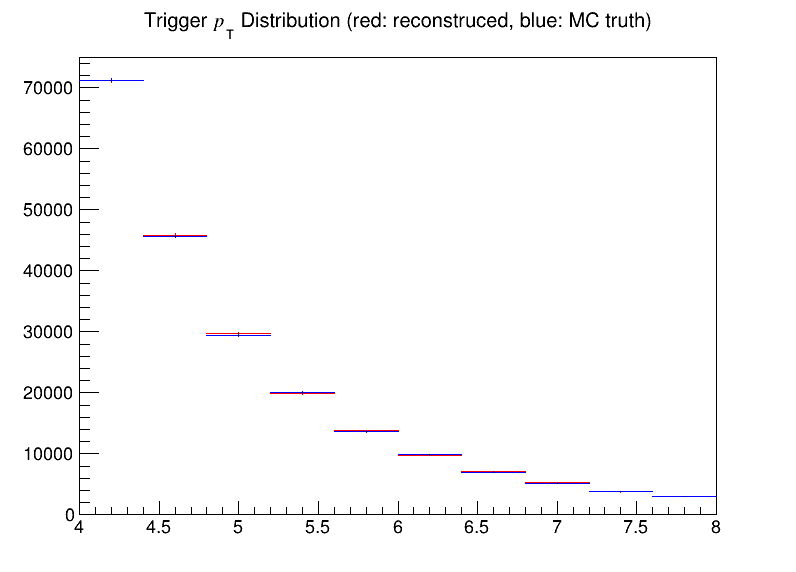

In [21]:
trig_pt_dist.Draw()
rt.gStyle.SetOptStat(0)
trig_pt_dist_mc.Draw("SAME")
c.Draw()


****************************************
Minimizer is Linear / Migrad
Chi2                      =      4.41627
NDf                       =            9
p0                        =      1.00197   +/-   0.00323208  


Info in <TCanvas::Print>: pdf file test.pdf has been created


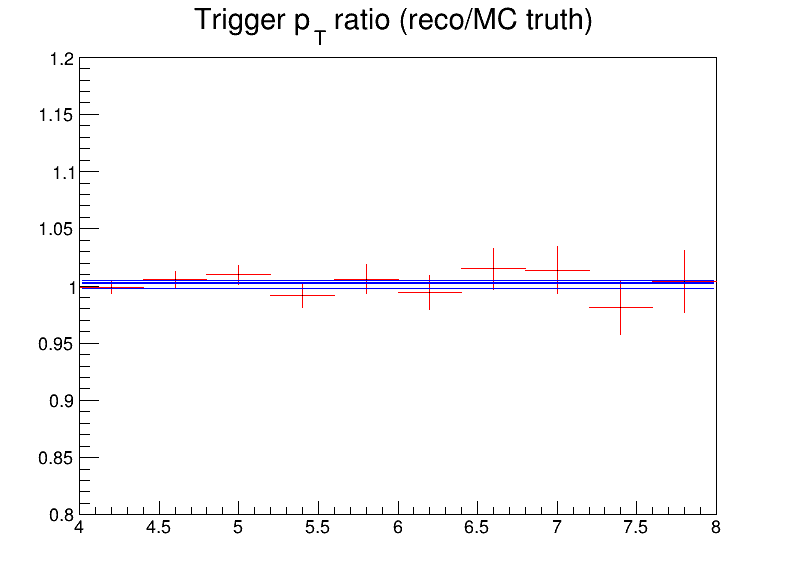

In [22]:
trig_pt_closure_ratio_fit = rt.TF1("trig_pt_closure_ratio_fit", "pol0", 4, 8)
trig_pt_closure_ratio_fit.SetLineColor(rt.kBlue)
trig_pt_closure_ratio_fit_plus = rt.TF1("trig_pt_closure_ratio_fit_plus", "pol0", 4, 8)
trig_pt_closure_ratio_fit_plus.SetLineColor(rt.kBlue)
trig_pt_closure_ratio_fit_minus = rt.TF1("trig_pt_closure_ratio_fit_minus", "pol0", 4, 8)
trig_pt_closure_ratio_fit_minus.SetLineColor(rt.kBlue)
trig_pt_closure_ratio_fit_minus.SetParameter(0, 1.00129 - 0.00355182)
trig_pt_closure_ratio_fit_plus.SetLineStyle(10)
trig_pt_closure_ratio_fit_plus.SetLineWidth(1)
trig_pt_closure_ratio_fit_minus.SetLineStyle(10)
trig_pt_closure_ratio_fit_minus.SetLineWidth(1)
trig_pt_closure_ratio_fit_plus.SetParameter(0, 1.00129 + 0.00355182)
trig_pt_closure_ratio_fit.SetLineStyle(10)
trig_pt_closure_ratio_fit.SetLineWidth(2)
trig_pt_dist_ratio = trig_pt_dist.Clone("trig_pt_dist_ratio")
trig_pt_dist_ratio.Divide(trig_pt_dist_ratio, trig_pt_dist_mc, 1, 1)
trig_pt_dist_ratio.GetYaxis().SetRangeUser(0.8, 1.2)
trig_pt_dist_ratio.SetTitle("Trigger p_{T} ratio (reco/MC truth)")
res = trig_pt_dist_ratio.Fit(trig_pt_closure_ratio_fit)
trig_pt_dist_ratio.Draw()
trig_pt_closure_ratio_fit_minus.Draw("SAME")
trig_pt_closure_ratio_fit_plus.Draw("SAME")
c.Draw()
c.SaveAs("test.pdf")

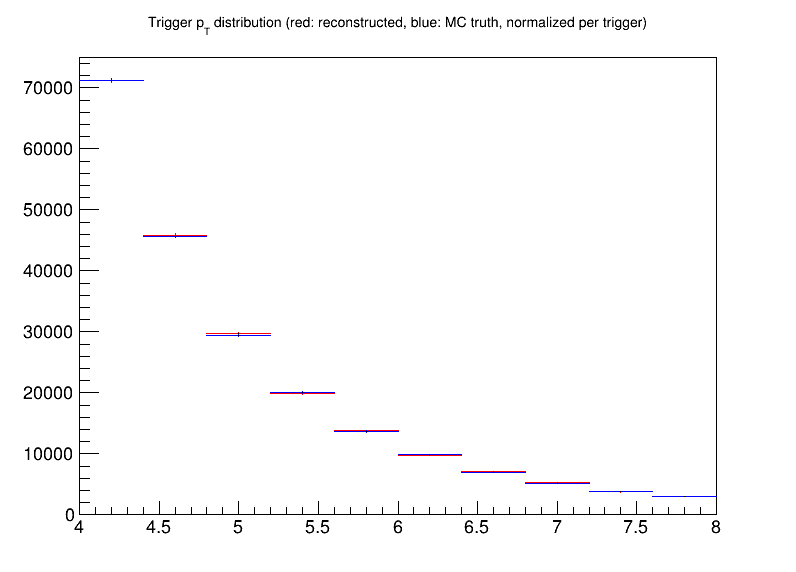

In [23]:
trig_pt_dist.SetTitle("Trigger p_{T} distribution (red: reconstructed, blue: MC truth, normalized per trigger)")
trig_pt_dist.Draw()
trig_pt_dist_mc.Draw("SAME")
c.Draw()

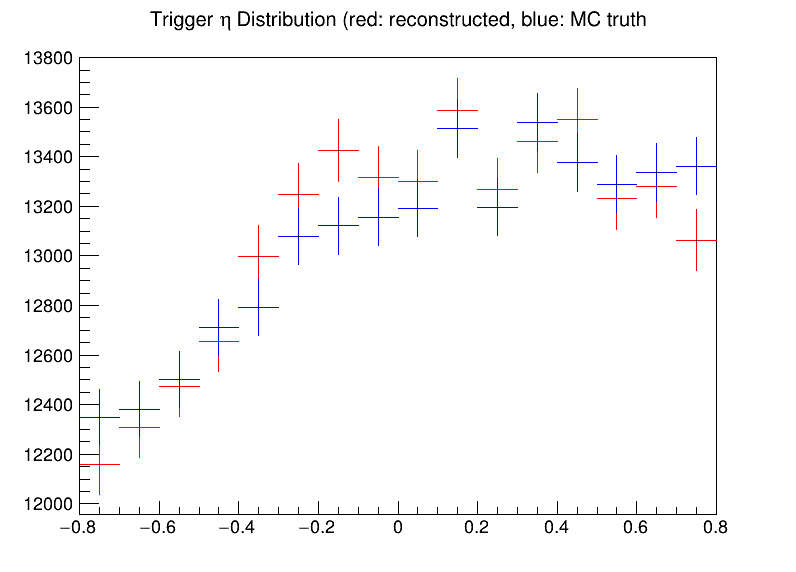

In [24]:
trig_eta_dist.Draw()
trig_eta_dist_mc.Draw("SAME")
c.Draw()

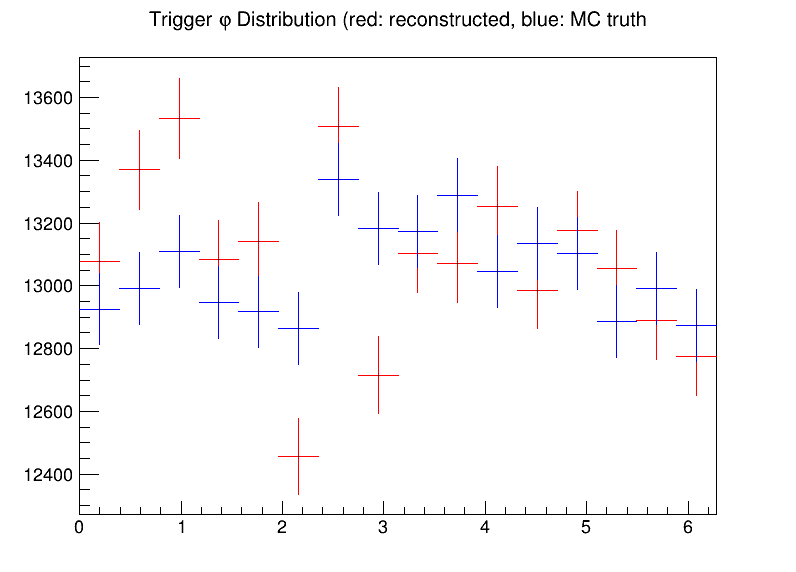

In [25]:
trig_phi_dist.Draw()
trig_phi_dist_mc.Draw("SAME")
c.Draw()

### Signal analysis section

In [26]:
lambda_mass_dist = lambda_dist.Projection(3).Clone("lambda_mass_dist")
lambda_mass_ls_dist = lambda_ls_dist.Projection(3).Clone("lambda_mass_ls_dist")
lambda_mass_dist_mc = lambda_dist_mc.Projection(3).Clone("lambda_mass_dist_mc")

Warning in <TFile::Append>: Replacing existing TH1: fTriggeredLambdaDist_proj_3 (Potential memory leak).


In [27]:
# scale LS to match lambda dist in RSB
left_bin = lambda_mass_dist.FindBin(RSB_MIN)
right_bin = lambda_mass_dist.FindBin(RSB_MAX)
lambda_mass_ls_dist.Scale(lambda_mass_dist.Integral(left_bin, right_bin)/lambda_mass_ls_dist.Integral(left_bin, right_bin))

In [28]:
lambda_mass_dist.SetTitle("#Lambda^{0} invariant mass distribution (p-#pi)")
lambda_mass_dist.Sumw2()
lambda_mass_dist.SetLineWidth(2)
lambda_mass_dist.GetXaxis().SetTitle("Mass (GeV/c^{2})")
lambda_mass_dist.GetYaxis().SetTitle("#frac{dN_{p-#pi}}{dM}")

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


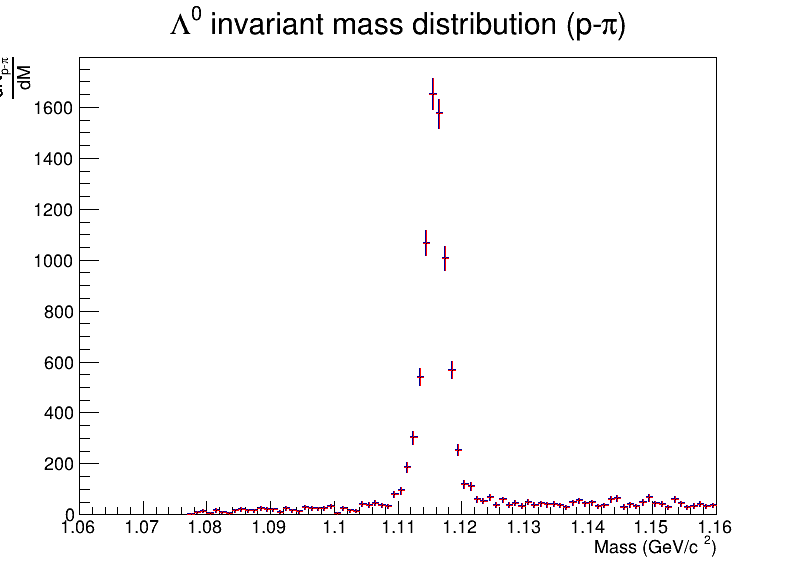

In [29]:
lambda_mass_dist.Draw()
lambda_mass_ls_dist.SetLineColor(rt.kRed)
lambda_mass_ls_dist.Draw("SAME")

c.Draw()

In [30]:
residual = lambda_mass_dist.Clone("residual")
residual.Add(lambda_mass_ls_dist, -1)

left_bin = residual.FindBin(SIG_MIN)
right_bin = residual.FindBin(SIG_MAX)

# THIS SCALE FACTOR IS SLIGHTLY INCORRECT, WE SHOULD BE USING RESIDUAL INTEGRAL BUT THE TRIGGERED EFFICIENCY IS WRONG
scale_factor = lambda_mass_dist_mc.Integral()/residual.Integral(left_bin, right_bin)

print(f"Extracted signal: {residual.Integral()}")
print(f"Real signal: {lambda_mass_dist_mc.Integral()}")
print(f"Scale_factor: {scale_factor}")
residual.Draw()
c.Draw()

ZeroDivisionError: float division by zero

In [31]:
left_signal_bin = lambda_mass_dist.FindBin(SIG_MIN)
right_signal_bin = lambda_mass_dist.FindBin(SIG_MAX)

lambda_bg = 0
lambda_total = 0
for bin_num in range(left_signal_bin, right_signal_bin + 1):
    lambda_bg += lambda_mass_ls_dist.GetBinContent(bin_num)
    lambda_total += lambda_mass_dist.GetBinContent(bin_num)

lambda_signal = lambda_total - lambda_bg
lambda_signal_total_ratio = lambda_signal/lambda_total
lambda_signal_bg_ratio = lambda_signal/lambda_bg
print(f"The 0-20 lambda signal is: {lambda_signal}")
print(f"The 0-20 lambda background is: {lambda_bg}")
print(f"The 0-20 lambda S/B is: {lambda_signal_bg_ratio}")
print(f"The 0-20 lambda S/T is: {lambda_signal_total_ratio}")
print(f"The 0-20 lambda significance is: {lambda_signal/math.sqrt(lambda_signal + lambda_bg)}")

The 0-20 lambda signal is: 0.0
The 0-20 lambda background is: 8374.006737709045
The 0-20 lambda S/B is: 0.0
The 0-20 lambda S/T is: 0.0
The 0-20 lambda significance is: 0.0


### Mixed event correction section

In [32]:
axes = arr.array('i', [2, 3, 4, 5])
h_lambda = h_lambda.Projection(4, axes)
h_lambda_mc = h_lambda_mc.Projection(4, axes)
h_lambda_mixed = h_lambda_mixed.Projection(4, axes)
h_lambda_mixed_mc = h_lambda_mixed_mc.Projection(4, axes)

In [33]:
h_h = h_h.Projection(2, 3, 4)
h_h_mc = h_h_mc.Projection(2, 3, 4)
h_h_mixed = h_h_mixed.Projection(2, 3, 4)
h_h_mixed_mc = h_h_mixed_mc.Projection(2, 3, 4)

In [34]:
# Setting up 2-d correlation plots before the mixed event correction
h_lambda_2d_nomixcor = h_lambda.Projection(0, 1).Clone("h_lambda_2d_nomixcor")
h_lambda_2d_nomixcor_mc = h_lambda_mc.Projection(0, 1).Clone("h_lambda_2d_nomixcor_mc")
h_lambda_mixed_2d = h_lambda_mixed.Projection(0, 1).Clone("h_lambda_mixed_2d")
h_lambda_mixed_2d_mc = h_lambda_mixed_mc.Projection(0, 1).Clone("h_lambda_mixed_2d_mc")

In [35]:
h_h_2d_nomixcor = h_h.Project3D("xye").Clone("h_h_2d_nomixcor")
h_h_2d_nomixcor_mc = h_h_mc.Project3D("xye").Clone("h_h_2d_nomixcor_mc")
h_h_mixed_2d = h_h_mixed.Project3D("xye").Clone("h_h_mixed_2d")
h_h_mixed_2d_mc = h_h_mixed_mc.Project3D("xye").Clone("h_h_mixed_2d_mc")

In [36]:
h_lambda_2d_nomixcor.SetTitle("h-#Lambda^{0} #Delta#varphi#Delta#eta (no acceptance correction)")
h_lambda_2d_nomixcor.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_lambda_2d_nomixcor.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_lambda_2d_nomixcor.GetXaxis().SetTitleSize(0.05)
h_lambda_2d_nomixcor.GetXaxis().SetTitleOffset(1.3)
h_lambda_2d_nomixcor.GetYaxis().SetTitleSize(0.05)
h_lambda_2d_nomixcor.GetYaxis().SetTitleOffset(1.3)

h_lambda_mixed_2d.SetTitle("Mixed-event h-#Lambda^{0} #Delta#varphi#Delta#eta")
h_lambda_mixed_2d.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_lambda_mixed_2d.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_lambda_mixed_2d.GetXaxis().SetTitleSize(0.05)
h_lambda_mixed_2d.GetXaxis().SetTitleOffset(1.3)
h_lambda_mixed_2d.GetYaxis().SetTitleSize(0.05)
h_lambda_mixed_2d.GetYaxis().SetTitleOffset(1.3)

h_lambda_2d_nomixcor_mc.SetTitle("h-#Lambda^{0} #Delta#varphi#Delta#eta (no acceptance correction, MC truth)")
h_lambda_2d_nomixcor_mc.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_lambda_2d_nomixcor_mc.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_lambda_2d_nomixcor_mc.GetXaxis().SetTitleSize(0.05)
h_lambda_2d_nomixcor_mc.GetXaxis().SetTitleOffset(1.3)
h_lambda_2d_nomixcor_mc.GetYaxis().SetTitleSize(0.05)
h_lambda_2d_nomixcor_mc.GetYaxis().SetTitleOffset(1.3)

h_lambda_mixed_2d_mc.SetTitle("Mixed-event h-#Lambda^{0} #Delta#varphi#Delta#eta (MC truth)")
h_lambda_mixed_2d_mc.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_lambda_mixed_2d_mc.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_lambda_mixed_2d_mc.GetXaxis().SetTitleSize(0.05)
h_lambda_mixed_2d_mc.GetXaxis().SetTitleOffset(1.3)
h_lambda_mixed_2d_mc.GetYaxis().SetTitleSize(0.05)
h_lambda_mixed_2d_mc.GetYaxis().SetTitleOffset(1.3)

In [37]:
h_h_2d_nomixcor.SetTitle("h-h #Delta#varphi#Delta#eta (no acceptance correction)")
h_h_2d_nomixcor.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_h_2d_nomixcor.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_h_2d_nomixcor.GetXaxis().SetTitleSize(0.05)
h_h_2d_nomixcor.GetXaxis().SetTitleOffset(1.3)
h_h_2d_nomixcor.GetYaxis().SetTitleSize(0.05)
h_h_2d_nomixcor.GetYaxis().SetTitleOffset(1.3)

h_h_mixed_2d.SetTitle("Mixed-event h-h #Delta#varphi#Delta#eta")
h_h_mixed_2d.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_h_mixed_2d.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_h_mixed_2d.GetXaxis().SetTitleSize(0.05)
h_h_mixed_2d.GetXaxis().SetTitleOffset(1.3)
h_h_mixed_2d.GetYaxis().SetTitleSize(0.05)
h_h_mixed_2d.GetYaxis().SetTitleOffset(1.3)

h_h_2d_nomixcor_mc.SetTitle("h-h #Delta#varphi#Delta#eta (no acceptance correction, MC truth)")
h_h_2d_nomixcor_mc.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_h_2d_nomixcor_mc.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_h_2d_nomixcor_mc.GetXaxis().SetTitleSize(0.05)
h_h_2d_nomixcor_mc.GetXaxis().SetTitleOffset(1.3)
h_h_2d_nomixcor_mc.GetYaxis().SetTitleSize(0.05)
h_h_2d_nomixcor_mc.GetYaxis().SetTitleOffset(1.3)

h_h_mixed_2d_mc.SetTitle("Mixed-event h-h #Delta#varphi#Delta#eta (MC truth)")
h_h_mixed_2d_mc.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_h_mixed_2d_mc.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_h_mixed_2d_mc.GetXaxis().SetTitleSize(0.05)
h_h_mixed_2d_mc.GetXaxis().SetTitleOffset(1.3)
h_h_mixed_2d_mc.GetYaxis().SetTitleSize(0.05)
h_h_mixed_2d_mc.GetYaxis().SetTitleOffset(1.3)

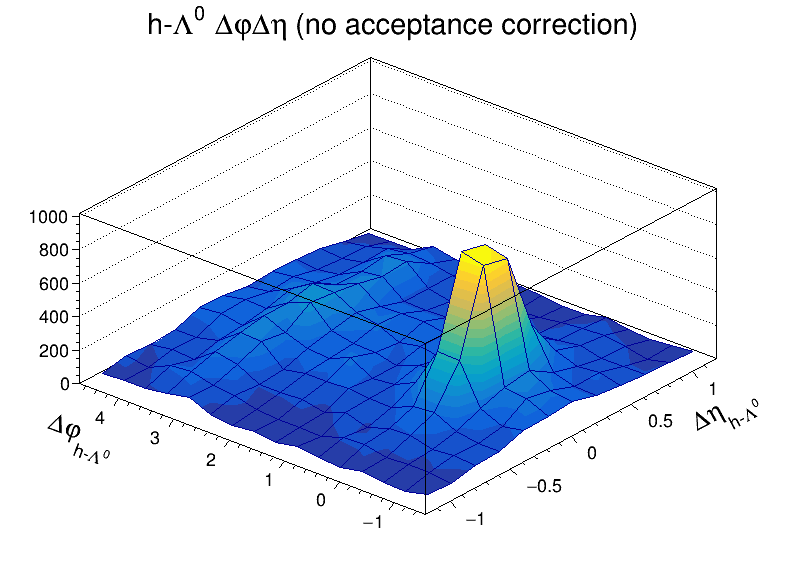

In [38]:
c.SetTheta(50)
c.SetPhi(50)
h_lambda_2d_nomixcor.GetXaxis().SetRangeUser(DELTA_ETA_MIN, DELTA_ETA_MAX)
h_lambda_2d_nomixcor.Draw("SURF1")
c.Draw()

In [39]:
h_lambda_2d_nomixcor.GetXaxis().SetRangeUser(DELTA_ETA_MIN, DELTA_ETA_MAX)
h_lambda_2d_nomixcor_mc.GetXaxis().SetRangeUser(DELTA_ETA_MIN, DELTA_ETA_MAX)

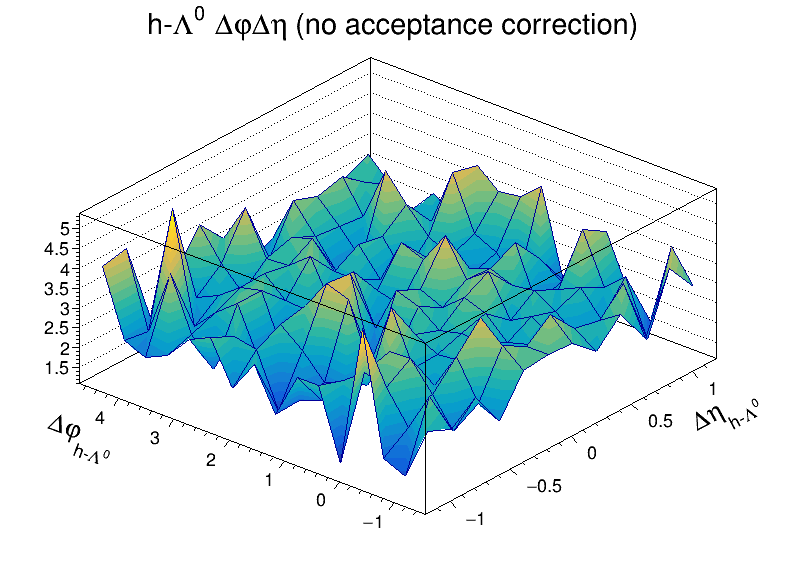

In [40]:
h_lambda_2d_ratio_nomixcor = h_lambda_2d_nomixcor.Clone("h_lambda_2d_ratio_nomixcor")
h_lambda_2d_ratio_nomixcor.Divide(h_lambda_2d_nomixcor_mc)
h_lambda_2d_ratio_nomixcor.Draw("SURF1")
c.Draw()

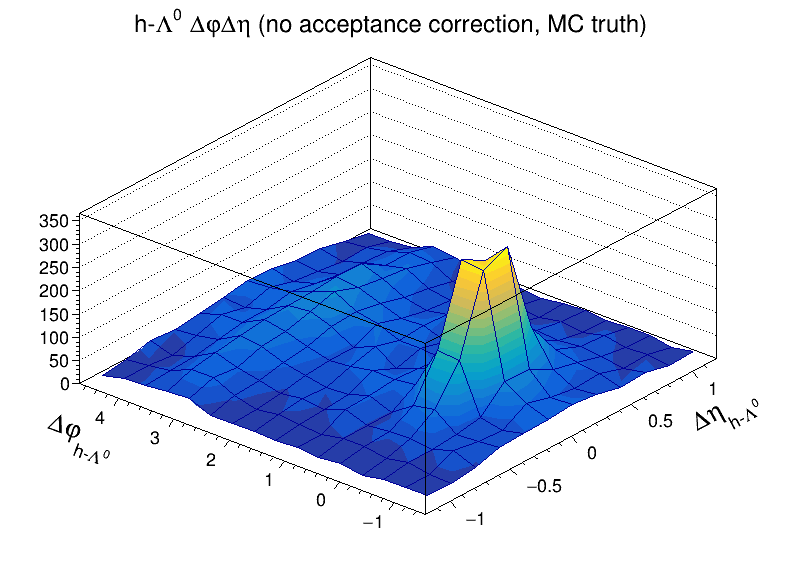

In [41]:
c.SetTheta(50)
c.SetPhi(50)
h_lambda_2d_nomixcor_mc.GetXaxis().SetRangeUser(DELTA_ETA_MIN, DELTA_ETA_MAX)
h_lambda_2d_nomixcor_mc.Draw("SURF1")
c.Draw()

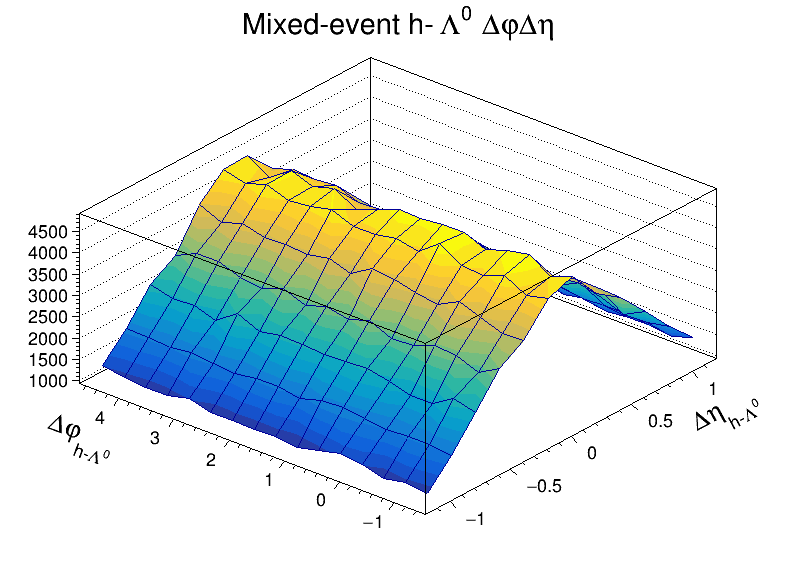

In [42]:
c.SetTheta(50)
c.SetPhi(50)
h_lambda_mixed_2d.GetXaxis().SetRangeUser(DELTA_ETA_MIN, DELTA_ETA_MAX)
h_lambda_mixed_2d.Draw("SURF1")
c.Draw()

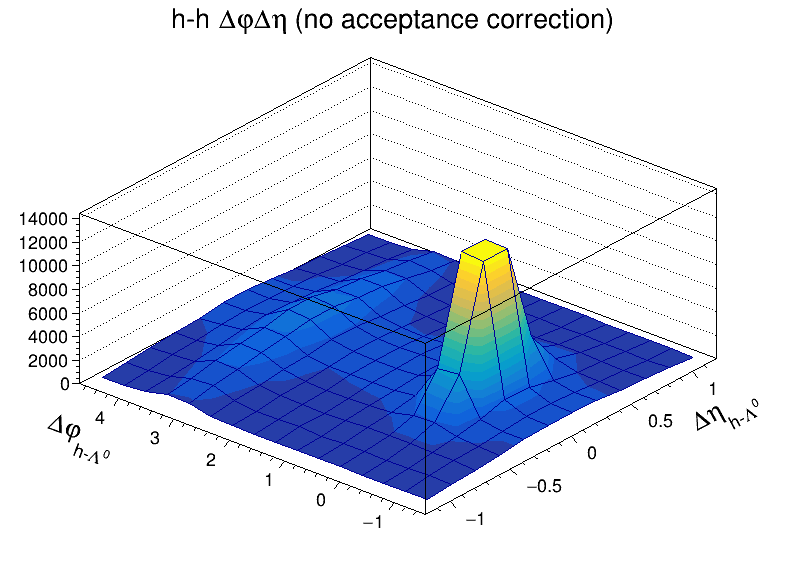

In [43]:
c.SetTheta(50)
c.SetPhi(50)
h_h_2d_nomixcor.GetXaxis().SetRangeUser(DELTA_ETA_MIN, DELTA_ETA_MAX)
h_h_2d_nomixcor.Draw("SURF1")
c.Draw()

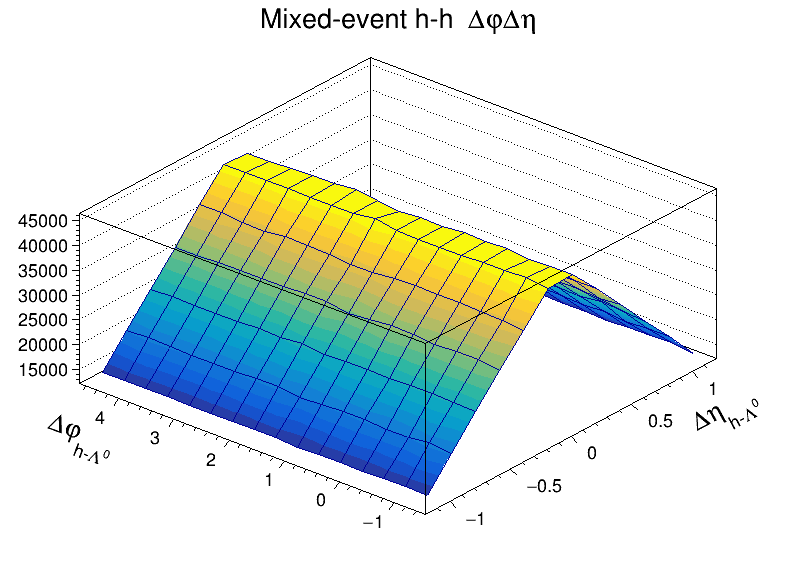

In [44]:
c.SetTheta(50)
c.SetPhi(50)
h_h_mixed_2d.GetXaxis().SetRangeUser(DELTA_ETA_MIN, DELTA_ETA_MAX)
h_h_mixed_2d.Draw("SURF1")
c.Draw()

In [49]:
h_lambda_2d_mixcor_sig = make_mixed_corrections(h_lambda, h_lambda_mixed, SIG_MIN, SIG_MAX)
h_lambda_2d_mixcor_rsb = make_mixed_corrections(h_lambda, h_lambda_mixed, RSB_MIN, RSB_MAX)

Warning in <TFile::Append>: Replacing existing TH1: fDphiHLambdaEff_proj_2_3_4_5_proj_0_1_3 (Potential memory leak).
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created
Warning in <TFile::Append>: Replacing existing TH1: fDphiHLambdaMixed_proj_2_3_4_5_proj_0_1_3 (Potential memory leak).
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created
Warning in <TFile::Append>: Replacing existing TH1: fDphiHLambdaEff_proj_2_3_4_5_proj_0_1_3 (Potential memory leak).
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created
Warning in <TFile::Append>: Replacing existing TH1: fDphiHLambdaMixed_proj_2_3_4_5_proj_0_1_3 (Potential memory leak).
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created


In [50]:
h_lambda_2d_mixcor_sig_mc = make_mixed_corrections(h_lambda_mc, h_lambda_mixed_mc, SIG_MIN, SIG_MAX)

Warning in <TFile::Append>: Replacing existing TH1: fDphiHLambda_MC_proj_2_3_4_5_proj_0_1_3 (Potential memory leak).
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created
Warning in <TFile::Append>: Replacing existing TH1: fDphiHLambdaMixed_MC_proj_2_3_4_5_proj_0_1_3 (Potential memory leak).
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created


In [51]:
# h_lambda_2d_mixcor_sig.RebinX(2)
# h_lambda_2d_mixcor_sig_mc.RebinX(2)
h_lambda_2d_mixcor_sig_mc_ratio = h_lambda_2d_mixcor_sig.Clone("h_lambda_2d_mixcor_sig_mc_ratio")
h_lambda_2d_mixcor_sig_mc_ratio.Divide(h_lambda_2d_mixcor_sig_mc)

True

Info in <TCanvas::Print>: pdf file trackmerge_efficiency_PLACEHOLDER.pdf has been created


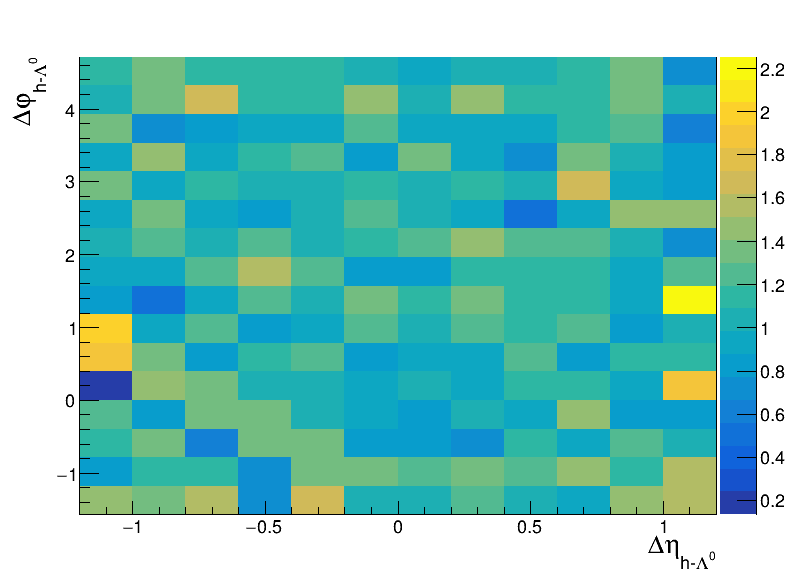

In [68]:
h_lambda_2d_mixcor_sig_mc_ratio.SetTitle("")
h_lambda_2d_mixcor_sig_mc_ratio.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_lambda_2d_mixcor_sig_mc_ratio.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_lambda_2d_mixcor_sig_mc_ratio.GetXaxis().SetTitleSize(0.05)
h_lambda_2d_mixcor_sig_mc_ratio.GetXaxis().SetTitleOffset(0.8)
h_lambda_2d_mixcor_sig_mc_ratio.GetYaxis().SetTitleSize(0.05)
h_lambda_2d_mixcor_sig_mc_ratio.GetYaxis().SetTitleOffset(0.8)
h_lambda_2d_mixcor_sig_mc_ratio.GetXaxis().SetRangeUser(DELTA_ETA_MIN, DELTA_ETA_MAX)
h_lambda_2d_mixcor_sig_mc_ratio.Draw("COLZ")
c.Draw()
c.SaveAs("trackmerge_efficiency_PLACEHOLDER.pdf")

In [53]:
h_h_2d_mixcor = make_mixed_corrections(h_h, h_h_mixed, SIG_MIN, SIG_MAX, is_hh=True)
h_h_2d_mixcor_mc = make_mixed_corrections(h_h_mc, h_h_mixed_mc, SIG_MIN, SIG_MAX, is_hh=True)

Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created


In [54]:
h_lambda_2d_mixcor_sig.SetTitle("h-#Lambda^{0} #Delta#varphi#Delta#eta correlation (SIG, acceptance corrected)")
h_lambda_2d_mixcor_sig.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_lambda_2d_mixcor_sig.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_lambda_2d_mixcor_sig.GetXaxis().SetTitleSize(0.05)
h_lambda_2d_mixcor_sig.GetXaxis().SetTitleOffset(1.3)
h_lambda_2d_mixcor_sig.GetYaxis().SetTitleSize(0.05)
h_lambda_2d_mixcor_sig.GetYaxis().SetTitleOffset(1.3)

h_lambda_2d_mixcor_rsb.SetTitle("h-#Lambda^{0} #Delta#varphi#Delta#eta correlation (RSB, acceptance corrected)")
h_lambda_2d_mixcor_rsb.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_lambda_2d_mixcor_rsb.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_lambda_2d_mixcor_rsb.GetXaxis().SetTitleSize(0.05)
h_lambda_2d_mixcor_rsb.GetXaxis().SetTitleOffset(1.3)
h_lambda_2d_mixcor_rsb.GetYaxis().SetTitleSize(0.05)
h_lambda_2d_mixcor_rsb.GetYaxis().SetTitleOffset(1.3)

In [55]:
h_h_2d_mixcor.SetTitle("h-h #Delta#varphi#Delta#eta correlation (acceptance corrected)")
h_h_2d_mixcor.GetYaxis().SetTitle("#Delta#varphi_{h-h}")
h_h_2d_mixcor.GetXaxis().SetTitle("#Delta#eta_{h-h}")
h_h_2d_mixcor.GetXaxis().SetTitleSize(0.05)
h_h_2d_mixcor.GetXaxis().SetTitleOffset(1.3)
h_h_2d_mixcor.GetYaxis().SetTitleSize(0.05)
h_h_2d_mixcor.GetYaxis().SetTitleOffset(1.3)

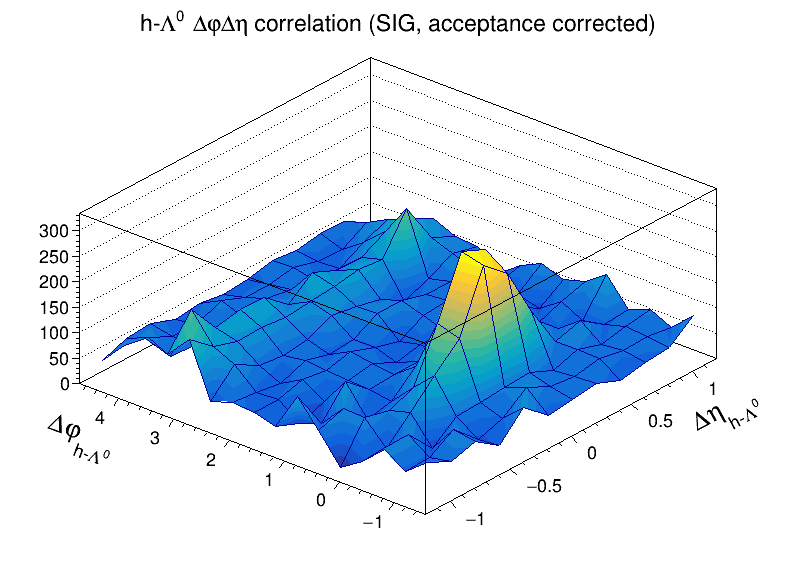

In [56]:
c.SetTheta(50)
c.SetPhi(50)
h_lambda_2d_mixcor_sig.GetXaxis().SetRangeUser(DELTA_ETA_MIN, DELTA_ETA_MAX)
h_lambda_2d_mixcor_sig.Draw("SURF1")
c.Draw()

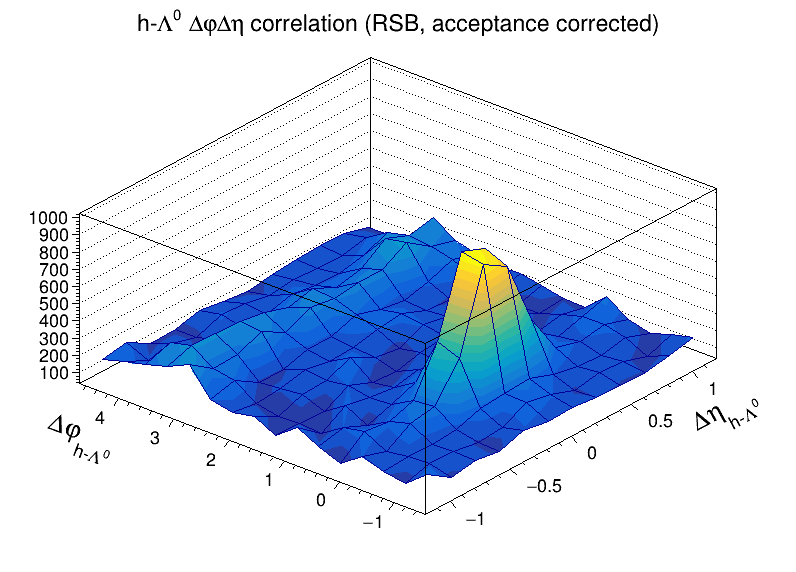

In [57]:
c.SetTheta(50)
c.SetPhi(50)
h_lambda_2d_mixcor_rsb.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_lambda_2d_mixcor_rsb.Draw("SURF1")
c.Draw()

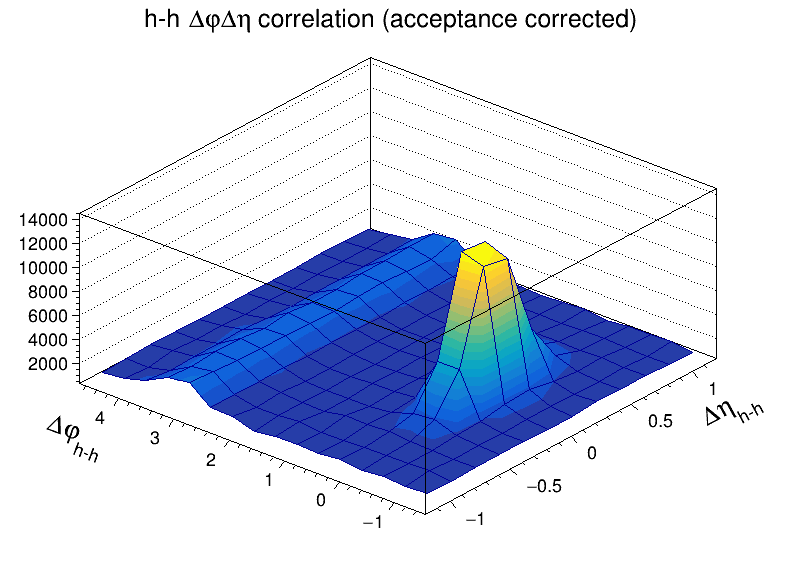

In [58]:
c.SetTheta(50)
c.SetPhi(50)
h_h_2d_mixcor.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_h_2d_mixcor.Draw("SURF1")
c.Draw()

In [59]:
h_lambda_2d_mixcor_sig_mc.GetXaxis().SetRangeUser(DELTA_ETA_MIN, DELTA_ETA_MAX)
h_h_2d_mixcor_mc.GetXaxis().SetRangeUser(DELTA_ETA_MIN, DELTA_ETA_MAX)

In [60]:
# per-trigger normalization done here
h_lambda_2d_mixcor_sig.Scale(1.0/num_trigs)
h_lambda_2d_mixcor_rsb.Scale(1.0/num_trigs)
h_lambda_2d_mixcor_sig_mc.Scale(1.0/num_trigs_mc)
h_h_2d_mixcor.Scale(1.0/num_trigs)
h_h_2d_mixcor_mc.Scale(1.0/num_trigs_mc)

In [61]:
# scaling by total region/signal region scale factor done here (not done for MC kinematics since signal region is just a single narrow bin)
if not USE_MC_KINEMATICS:
    h_lambda_2d_mixcor_sig.Scale(scale_factor)
    h_lambda_2d_mixcor_rsb.Scale(scale_factor)

NameError: name 'scale_factor' is not defined

In [62]:
# MC truth does not need sideband subtraction
h_lambda_2d_subtracted_mc = h_lambda_2d_mixcor_sig_mc
h_lambda_2d_subtracted = h_lambda_2d_mixcor_sig

### Sideband subtraction section

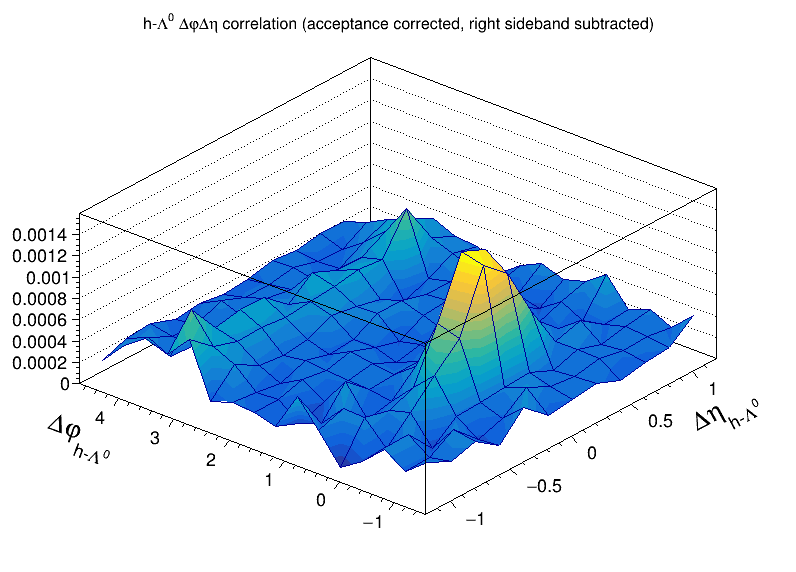

In [63]:
h_lambda_2d_subtracted = h_lambda_2d_mixcor_sig.Clone("h_lambda_2d_subtracted")
if DO_SIDEBAND_SUBTRACTION:
    # Normalize side band to 1
    h_lambda_2d_mixcor_rsb.Scale(1/h_lambda_2d_mixcor_rsb.Integral())

    # using RSB for sideband subtraction (there is no LSB, signal is present)
    bg_integral = (1 - lambda_signal_total_ratio)*h_lambda_2d_subtracted.Integral()
    h_lambda_2d_subtracted.Add(h_lambda_2d_mixcor_rsb, -bg_integral)

# drawing the subtracted 2-d correlation correlation
h_lambda_2d_subtracted.SetTitle("h-#Lambda^{0} #Delta#varphi#Delta#eta correlation (acceptance corrected, right sideband subtracted)")
h_lambda_2d_subtracted.Draw("SURF1")
c.Draw()

### Integral and ratio section

In [64]:
h_lambda_dphi_subtracted = h_lambda_2d_subtracted.ProjectionY("h_lambda_dphi_subtracted")
h_lambda_dphi_subtracted.SetTitle("h-#Lambda^{0} #Delta#varphi distribution (0 - 20 multiplicty bin)")
h_lambda_dphi_subtracted.SetLineColor(rt.kRed)
h_lambda_dphi_subtracted.SetLineWidth(3)
h_lambda_dphi_subtracted.GetYaxis().SetTitle("#frac{dN_{h-#Lambda^{0}}}{d#Delta#varphi}")
h_lambda_dphi_subtracted.GetXaxis().SetTitleSize(0.05)
h_lambda_dphi_subtracted.GetXaxis().SetTitleOffset(0.5)

In [65]:
h_lambda_dphi_subtracted_mc = h_lambda_2d_subtracted_mc.ProjectionY("h_lambda_dphi_subtracted_mc")
h_lambda_dphi_subtracted_mc.SetTitle("h-#Lambda^{0} #Delta#varphi distribution (0 - 20 multiplicty bin, MC truth)")
h_lambda_dphi_subtracted_mc.SetLineColor(rt.kBlue)
h_lambda_dphi_subtracted_mc.SetLineWidth(3)
h_lambda_dphi_subtracted_mc.GetYaxis().SetTitle("#frac{dN_{h-#Lambda^{0}}}{d#Delta#varphi}")
h_lambda_dphi_subtracted_mc.GetXaxis().SetTitleSize(0.05)
h_lambda_dphi_subtracted_mc.GetXaxis().SetTitleOffset(0.5)

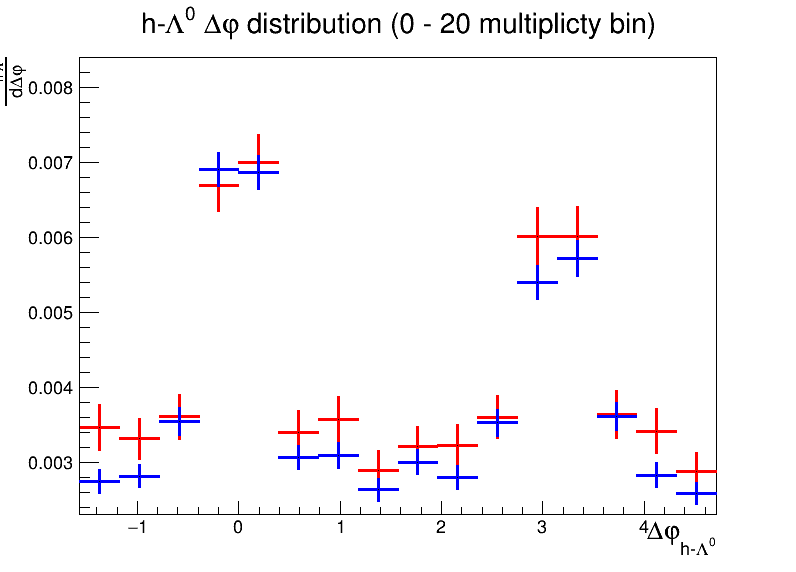

In [66]:
h_lambda_dphi_subtracted.Draw()
h_lambda_dphi_subtracted.GetYaxis().SetRangeUser(h_lambda_dphi_subtracted.GetMinimum()*0.8, h_lambda_dphi_subtracted.GetMaximum()*1.2)
h_lambda_dphi_subtracted_mc.SetLineColor(rt.kBlue)
h_lambda_dphi_subtracted_mc.Draw("SAME")
c.Draw()


****************************************
Minimizer is Linear / Migrad
Chi2                      =      10.0271
NDf                       =           15
p0                        =      1.06564   +/-   0.02386     


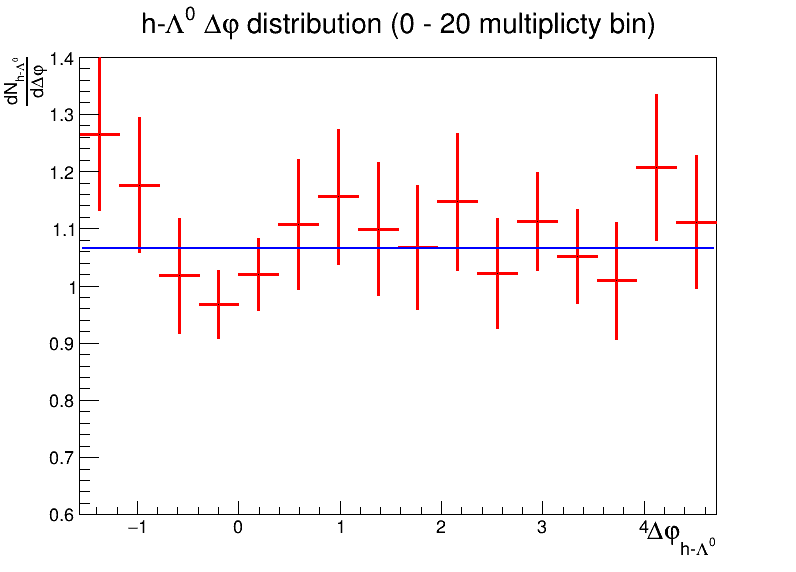

In [67]:
hl_closure_ratio_fit = rt.TF1("hl_closure_ratio_fit", "pol0", -2, 5)
hl_closure_ratio_fit.SetLineColor(rt.kBlue)
hl_closure_ratio_fit_plus = rt.TF1("hl_closure_ratio_fit_plus", "pol0", -2, 5)
hl_closure_ratio_fit_plus.SetLineColor(rt.kBlue)
hl_closure_ratio_fit_minus = rt.TF1("hl_closure_ratio_fit_minus", "pol0", -2, 5)
hl_closure_ratio_fit_minus.SetLineColor(rt.kBlue)
hl_closure_ratio_fit_minus.SetParameter(0, 0.967735 - 0.0261404)
hl_closure_ratio_fit_plus.SetLineStyle(10)
hl_closure_ratio_fit_plus.SetLineWidth(1)
hl_closure_ratio_fit_minus.SetLineStyle(10)
hl_closure_ratio_fit_minus.SetLineWidth(1)
hl_closure_ratio_fit_plus.SetParameter(0, 0.967735 + 0.0261404)
hl_closure_ratio_fit.SetLineStyle(10)
hl_closure_ratio_fit.SetLineWidth(2)
h_lambda_dphi_subtracted_ratio = h_lambda_dphi_subtracted.Clone("h_lambda_dphi_subtracted_ratio")
h_lambda_dphi_subtracted_ratio.Divide(h_lambda_dphi_subtracted_mc)
h_lambda_dphi_subtracted_ratio.GetYaxis().SetRangeUser(0.6, 1.4)
h_lambda_dphi_subtracted_ratio.Fit(hl_closure_ratio_fit)
h_lambda_dphi_subtracted_ratio.Draw()
# hl_closure_ratio_fit_plus.Draw("SAME")
# hl_closure_ratio_fit_minus.Draw("SAME")
c.Draw()

In [61]:
if USE_AVG:
    ue_line = rt.TF1("ue_line", "pol0", -2, 6)
    ue_upper_line = rt.TF1("ue_upper_line", "pol0", -2, 6)
    ue_lower_line = rt.TF1("ue_lower_line", "pol0", -2, 6)
    zero_line = rt.TF1("zero_line", "pol0", -2, 6)
    zero_upper_line = rt.TF1("zero_upper_line", "pol0", -2, 6)
    zero_lower_line = rt.TF1("zero_lower_line", "pol0", -2, 6)
    ue_avg = (h_lambda_dphi_subtracted.GetBinContent(1) 
                   + h_lambda_dphi_subtracted.GetBinContent(8)
                   + h_lambda_dphi_subtracted.GetBinContent(9)
                   + h_lambda_dphi_subtracted.GetBinContent(16))/4

    ue_avg_error = (1/4)*(math.sqrt(h_lambda_dphi_subtracted.GetBinError(1)**2 
                   + h_lambda_dphi_subtracted.GetBinError(8)**2
                   + h_lambda_dphi_subtracted.GetBinError(9)**2
                   + h_lambda_dphi_subtracted.GetBinError(16)**2))


    ue_line.SetParameter(0, ue_avg)
    ue_line.SetLineColor(rt.kViolet - 6)
    ue_line.SetLineWidth(3)
    ue_line.SetLineStyle(rt.kSolid)

    ue_upper_line.SetParameter(0, ue_avg + ue_avg_error)
    ue_upper_line.SetLineColor(rt.kViolet - 6)
    ue_upper_line.SetLineStyle(rt.kDashed)

    ue_lower_line.SetParameter(0, ue_avg - ue_avg_error)
    ue_lower_line.SetLineColor(rt.kViolet - 6)
    ue_lower_line.SetLineStyle(rt.kDashed)

    zero_line.SetParameter(0, 0)
    zero_line.SetLineColor(rt.kViolet - 6)
    zero_line.SetLineWidth(3)
    zero_line.SetLineStyle(rt.kSolid)
    zero_upper_line.SetParameter(0, ue_avg_error)
    zero_upper_line.SetLineColor(rt.kViolet - 6)
    zero_upper_line.SetLineStyle(rt.kDashed)
    zero_lower_line.SetParameter(0, -ue_avg_error)
    zero_lower_line.SetLineColor(rt.kViolet - 6)
    zero_lower_line.SetLineStyle(rt.kDashed)
elif USE_ZYAM:
    ue_line = rt.TF1("ue_line", "pol0", -2, 6)
    ue_upper_line = rt.TF1("ue_upper_line", "pol0", -2, 6)
    ue_lower_line = rt.TF1("ue_lower_line", "pol0", -2, 6)
    zero_line = rt.TF1("zero_line", "pol0", -2, 6)
    zero_upper_line = rt.TF1("zero_upper_line", "pol0", -2, 6)
    zero_lower_line = rt.TF1("zero_lower_line", "pol0", -2, 6)
    min_bin = h_lambda_dphi_subtracted.GetMinimumBin()
    ue_avg = h_lambda_dphi_subtracted.GetBinContent(min_bin)
    ue_avg_error = h_lambda_dphi_subtracted.GetBinError(min_bin)


    ue_line.SetParameter(0, ue_avg)
    ue_line.SetLineColor(rt.kViolet - 6)
    ue_line.SetLineWidth(3)
    ue_line.SetLineStyle(rt.kSolid)

    ue_upper_line.SetParameter(0, ue_avg + ue_avg_error)
    ue_upper_line.SetLineColor(rt.kViolet - 6)
    ue_upper_line.SetLineStyle(rt.kDashed)

    ue_lower_line.SetParameter(0, ue_avg - ue_avg_error)
    ue_lower_line.SetLineColor(rt.kViolet - 6)
    ue_lower_line.SetLineStyle(rt.kDashed)

    zero_line.SetParameter(0, 0)
    zero_line.SetLineColor(rt.kViolet - 6)
    zero_line.SetLineWidth(3)
    zero_line.SetLineStyle(rt.kSolid)
    zero_upper_line.SetParameter(0, ue_avg_error)
    zero_upper_line.SetLineColor(rt.kViolet - 6)
    zero_upper_line.SetLineStyle(rt.kDashed)
    zero_lower_line.SetParameter(0, -ue_avg_error)
    zero_lower_line.SetLineColor(rt.kViolet - 6)
    zero_lower_line.SetLineStyle(rt.kDashed)
else:
    raise NotImplementedError("UE line mode not supported")

In [ ]:
if USE_AVG:
    ue_line_mc = rt.TF1("ue_line_mc", "pol0", -2, 6)
    ue_upper_line_mc = rt.TF1("ue_upper_line_mc", "pol0", -2, 6)
    ue_lower_line_mc = rt.TF1("ue_lower_line_mc", "pol0", -2, 6)
    zero_line_mc = rt.TF1("zero_line_mc", "pol0", -2, 6)
    zero_upper_line_mc = rt.TF1("zero_upper_line_mc", "pol0", -2, 6)
    zero_lower_line_mc = rt.TF1("zero_lower_line_mc", "pol0", -2, 6)
    ue_avg_mc = (h_lambda_dphi_subtracted_mc.GetBinContent(1) 
                   + h_lambda_dphi_subtracted_mc.GetBinContent(8)
                   + h_lambda_dphi_subtracted_mc.GetBinContent(9)
                   + h_lambda_dphi_subtracted_mc.GetBinContent(16))/4

    ue_avg_error_mc = (1/4)*(math.sqrt(h_lambda_dphi_subtracted_mc.GetBinError(1)**2 
                   + h_lambda_dphi_subtracted_mc.GetBinError(8)**2
                   + h_lambda_dphi_subtracted_mc.GetBinError(9)**2
                   + h_lambda_dphi_subtracted_mc.GetBinError(16)**2))


    ue_line_mc.SetParameter(0, ue_avg_mc)
    ue_line_mc.SetLineColor(rt.kViolet - 6)
    ue_line_mc.SetLineWidth(3)
    ue_line_mc.SetLineStyle(rt.kSolid)

    ue_upper_line_mc.SetParameter(0, ue_avg_mc + ue_avg_error_mc)
    ue_upper_line_mc.SetLineColor(rt.kViolet - 6)
    ue_upper_line_mc.SetLineStyle(rt.kDashed)

    ue_lower_line_mc.SetParameter(0, ue_avg_mc - ue_avg_error_mc)
    ue_lower_line_mc.SetLineColor(rt.kViolet - 6)
    ue_lower_line_mc.SetLineStyle(rt.kDashed)

    zero_line_mc.SetParameter(0, 0)
    zero_line_mc.SetLineColor(rt.kViolet - 6)
    zero_line_mc.SetLineWidth(3)
    zero_line_mc.SetLineStyle(rt.kSolid)
    zero_upper_line_mc.SetParameter(0, ue_avg_error_mc)
    zero_upper_line_mc.SetLineColor(rt.kViolet - 6)
    zero_upper_line_mc.SetLineStyle(rt.kDashed)
    zero_lower_line_mc.SetParameter(0, -ue_avg_error_mc)
    zero_lower_line_mc.SetLineColor(rt.kViolet - 6)
    zero_lower_line_mc.SetLineStyle(rt.kDashed)
elif USE_ZYAM:
    ue_line_mc = rt.TF1("ue_line_mc", "pol0", -2, 6)
    ue_upper_line_mc = rt.TF1("ue_upper_line_mc", "pol0", -2, 6)
    ue_lower_line_mc = rt.TF1("ue_lower_line_mc", "pol0", -2, 6)
    zero_line_mc = rt.TF1("zero_line_mc", "pol0", -2, 6)
    zero_upper_line_mc = rt.TF1("zero_upper_line_mc", "pol0", -2, 6)
    zero_lower_line_mc = rt.TF1("zero_lower_line_mc", "pol0", -2, 6)
    min_bin = h_lambda_dphi_subtracted_mc.GetMinimumBin()
    ue_avg_mc = h_lambda_dphi_subtracted_mc.GetBinContent(min_bin)
    ue_avg_error_mc = h_lambda_dphi_subtracted_mc.GetBinError(min_bin)


    ue_line_mc.SetParameter(0, ue_avg_mc)
    ue_line_mc.SetLineColor(rt.kViolet - 6)
    ue_line_mc.SetLineWidth(3)
    ue_line_mc.SetLineStyle(rt.kSolid)

    ue_upper_line_mc.SetParameter(0, ue_avg_mc + ue_avg_error_mc)
    ue_upper_line_mc.SetLineColor(rt.kViolet - 6)
    ue_upper_line_mc.SetLineStyle(rt.kDashed)

    ue_lower_line_mc.SetParameter(0, ue_avg_mc - ue_avg_error_mc)
    ue_lower_line_mc.SetLineColor(rt.kViolet - 6)
    ue_lower_line_mc.SetLineStyle(rt.kDashed)

    zero_line_mc.SetParameter(0, 0)
    zero_line_mc.SetLineColor(rt.kViolet - 6)
    zero_line_mc.SetLineWidth(3)
    zero_line_mc.SetLineStyle(rt.kSolid)
    zero_upper_line_mc.SetParameter(0, ue_avg_error_mc)
    zero_upper_line_mc.SetLineColor(rt.kViolet - 6)
    zero_upper_line_mc.SetLineStyle(rt.kDashed)
    zero_lower_line_mc.SetParameter(0, -ue_avg_error_mc)
    zero_lower_line_mc.SetLineColor(rt.kViolet - 6)
    zero_lower_line_mc.SetLineStyle(rt.kDashed)
else:
    raise NotImplementedError("UE line mode not supported")

In [ ]:
min_bin = h_lambda_dphi_subtracted.GetMinimumBin()
min_val = h_lambda_dphi_subtracted.GetBinContent(min_bin)
max_bin = h_lambda_dphi_subtracted.GetMaximumBin()
max_val = h_lambda_dphi_subtracted.GetBinContent(max_bin)

h_lambda_dphi_subtracted.GetYaxis().SetRangeUser(0.85*min_val, 1.15*max_val)
h_lambda_dphi_subtracted.Draw()
ue_line.Draw("SAME")
ue_upper_line.Draw("SAME")
ue_lower_line.Draw("SAME")
c.Draw()

In [ ]:
h_lambda_dphi_subtracted.GetYaxis().SetRangeUser(0, 1.15*max_val)
h_lambda_dphi_subtracted.Draw()
ue_line.Draw("SAME")
ue_upper_line.Draw("SAME")
ue_lower_line.Draw("SAME")
c.Draw()

In [ ]:
h_lambda_dphi_subtracted_zeroed = h_lambda_dphi_subtracted.Clone("h_lambda_dphi_subtracted_zeroed")
h_lambda_dphi_subtracted_zeroed.SetTitle("h-#Lambda^{0} #Delta#varphi distribution (UE subtracted, 0 - 20 multiplicity bin)")
h_lambda_dphi_subtracted_zeroed.Add(ue_line, -1)
h_lambda_dphi_subtracted_zeroed.Draw()
zero_line.Draw("SAME")
zero_upper_line.Draw("SAME")
zero_lower_line.Draw("SAME")
c.Draw()

In [ ]:
DPHI_BINS = h_lambda_dphi_subtracted.GetNbinsX()

In [ ]:
h_lambda_total_integral = 0
h_lambda_near_integral = 0
h_lambda_away_integral = 0
h_lambda_ue_integral = ue_avg*DPHI_BINS

h_lambda_total_integral_error = 0
h_lambda_near_integral_error = 0
h_lambda_away_integral_error = 0
h_lambda_ue_integral_error = ue_avg_error*DPHI_BINS

for bin_num in range(1, DPHI_BINS + 1):
    h_lambda_total_integral += h_lambda_dphi_subtracted.GetBinContent(bin_num)
    h_lambda_total_integral_error += h_lambda_dphi_subtracted.GetBinError(bin_num)**2
    part = h_lambda_dphi_subtracted.GetBinContent(bin_num) - ue_avg
    if part < 0:
        continue
    if bin_num < 9:
        h_lambda_near_integral += part
        h_lambda_near_integral_error += h_lambda_dphi_subtracted.GetBinError(bin_num)**2
        h_lambda_near_integral_error += ue_avg_error**2
    else:
        h_lambda_away_integral += part
        h_lambda_away_integral_error += h_lambda_dphi_subtracted.GetBinError(bin_num)**2
        h_lambda_away_integral_error += ue_avg_error**2
h_lambda_total_integral_error = math.sqrt(h_lambda_total_integral_error)
h_lambda_near_integral_error = math.sqrt(h_lambda_near_integral_error)
h_lambda_away_integral_error = math.sqrt(h_lambda_away_integral_error)

In [ ]:
h_lambda_total_integral_mc = 0
h_lambda_near_integral_mc = 0
h_lambda_away_integral_mc = 0
h_lambda_ue_integral_mc = ue_avg_mc*DPHI_BINS

h_lambda_total_integral_error_mc = 0
h_lambda_near_integral_error_mc = 0
h_lambda_away_integral_error_mc = 0
h_lambda_ue_integral_error_mc = ue_avg_error_mc*DPHI_BINS

for bin_num in range(1, DPHI_BINS + 1):
    h_lambda_total_integral_mc += h_lambda_dphi_subtracted_mc.GetBinContent(bin_num)
    h_lambda_total_integral_error_mc += h_lambda_dphi_subtracted_mc.GetBinError(bin_num)**2
    part = h_lambda_dphi_subtracted_mc.GetBinContent(bin_num) - ue_avg_mc
    if part < 0:
        continue
    if bin_num < 9:
        h_lambda_near_integral_mc += part 
        h_lambda_near_integral_error_mc += h_lambda_dphi_subtracted_mc.GetBinError(bin_num)**2
        h_lambda_near_integral_error_mc += ue_avg_error_mc**2
    else:
        h_lambda_away_integral_mc += part 
        h_lambda_away_integral_error_mc += h_lambda_dphi_subtracted_mc.GetBinError(bin_num)**2
        h_lambda_away_integral_error_mc += ue_avg_error_mc**2
h_lambda_total_integral_error_mc = math.sqrt(h_lambda_total_integral_error_mc)
h_lambda_near_integral_error_mc = math.sqrt(h_lambda_near_integral_error_mc)
h_lambda_away_integral_error_mc = math.sqrt(h_lambda_away_integral_error_mc)

In [ ]:
h_h_dphi = h_h_2d_mixcor.ProjectionY("h_h_dphi")
h_h_dphi.SetTitle("h-h #Delta#varphi distribution (0 - 20 multiplicty bin)")
h_h_dphi.SetLineColor(rt.kRed)
h_h_dphi.SetLineWidth(3)
h_h_dphi.GetYaxis().SetTitle("#frac{dN_{h-h}}{d#Delta#varphi}")
h_h_dphi.GetXaxis().SetTitleSize(0.05)
h_h_dphi.GetXaxis().SetTitleOffset(0.5)

In [ ]:
h_h_dphi_mc = h_h_2d_mixcor_mc.ProjectionY("h_h_dphi_mc")
h_h_dphi_mc.SetTitle("h-h #Delta#varphi distribution (0 - 20 multiplicty bin)")
h_h_dphi_mc.SetLineColor(rt.kBlue)
h_h_dphi_mc.SetLineWidth(3)
h_h_dphi_mc.GetYaxis().SetTitle("#frac{dN_{h-h}}{d#Delta#varphi}")
h_h_dphi_mc.GetXaxis().SetTitleSize(0.05)
h_h_dphi_mc.GetXaxis().SetTitleOffset(0.5)

In [ ]:
h_h_dphi.Scale(1/h_h_dphi.Integral())
h_h_dphi_mc.Scale(1/h_h_dphi_mc.Integral())
h_h_dphi.Scale(h_h_dphi_mc.Integral(1, 1)/h_h_dphi.Integral(1, 1))
h_h_dphi_mc.Draw()
h_h_dphi.Draw("SAME")
c.Draw()

In [ ]:
hh_closure_ratio_fit = rt.TF1("hh_closure_ratio_fit", "pol0", -2, 5)
hh_closure_ratio_fit.SetLineColor(rt.kBlue)
hh_closure_ratio_fit_plus = rt.TF1("hh_closure_ratio_fit_plus", "pol0", -2, 5)
hh_closure_ratio_fit_plus.SetLineColor(rt.kBlue)
hh_closure_ratio_fit_minus = rt.TF1("hh_closure_ratio_fit_minus", "pol0", -2, 5)
hh_closure_ratio_fit_minus.SetLineColor(rt.kBlue)
hh_closure_ratio_fit_minus.SetParameter(0, 1.00181 - 0.00373534)
hh_closure_ratio_fit_plus.SetLineStyle(10)
hh_closure_ratio_fit_plus.SetLineWidth(1)
hh_closure_ratio_fit_minus.SetLineStyle(10)
hh_closure_ratio_fit_minus.SetLineWidth(1)
hh_closure_ratio_fit_plus.SetParameter(0, 1.00181 + 0.00373534)
hh_closure_ratio_fit.SetLineStyle(10)
hh_closure_ratio_fit.SetLineWidth(2)
h_h_dphi.Divide(h_h_dphi_mc)
h_h_dphi.Fit(hh_closure_ratio_fit)
h_h_dphi.GetYaxis().SetRangeUser(0.8, 1.2)
h_h_dphi.Draw()
# hh_closure_ratio_fit_minus.Draw("SAME")
# hh_closure_ratio_fit_plus.Draw("SAME")

c.Draw()

In [ ]:
if USE_AVG:
    hh_ue_line = rt.TF1("hh_ue_line", "pol0", -2, 6)
    hh_ue_upper_line = rt.TF1("hh_ue_upper_line", "pol0", -2, 6)
    hh_ue_lower_line = rt.TF1("hh_ue_lower_line", "pol0", -2, 6)
    hh_zero_line = rt.TF1("hh_zero_line", "pol0", -2, 6)
    hh_zero_upper_line = rt.TF1("hh_zero_upper_line", "pol0", -2, 6)
    hh_zero_lower_line = rt.TF1("hh_zero_lower_line", "pol0", -2, 6)
    hh_ue_avg = (h_h_dphi.GetBinContent(1) 
                   + h_h_dphi.GetBinContent(8)
                   + h_h_dphi.GetBinContent(9)
                   + h_h_dphi.GetBinContent(16))/4

    hh_ue_avg_error = (1/4)*(math.sqrt(h_h_dphi.GetBinError(1)**2 
                   + h_h_dphi.GetBinError(8)**2
                   + h_h_dphi.GetBinError(9)**2
                   + h_h_dphi.GetBinError(16)**2))


    hh_ue_line.SetParameter(0, hh_ue_avg)
    hh_ue_line.SetLineColor(rt.kBlue)
    hh_ue_line.SetLineWidth(3)
    hh_ue_line.SetLineStyle(rt.kSolid)

    hh_ue_upper_line.SetParameter(0, hh_ue_avg + hh_ue_avg_error)
    hh_ue_upper_line.SetLineColor(rt.kBlue)
    hh_ue_upper_line.SetLineStyle(rt.kDashed)

    hh_ue_lower_line.SetParameter(0, hh_ue_avg - hh_ue_avg_error)
    hh_ue_lower_line.SetLineColor(rt.kBlue)
    hh_ue_lower_line.SetLineStyle(rt.kDashed)

    hh_zero_line.SetParameter(0, 0)
    hh_zero_line.SetLineColor(rt.kBlue)
    hh_zero_line.SetLineWidth(3)
    hh_zero_line.SetLineStyle(rt.kSolid)
    hh_zero_upper_line.SetParameter(0, hh_ue_avg_error)
    hh_zero_upper_line.SetLineColor(rt.kBlue)
    hh_zero_upper_line.SetLineStyle(rt.kDashed)
    hh_zero_lower_line.SetParameter(0, -hh_ue_avg_error)
    hh_zero_lower_line.SetLineColor(rt.kBlue)
    hh_zero_lower_line.SetLineStyle(rt.kDashed)
elif USE_ZYAM:
    hh_ue_line = rt.TF1("hh_ue_line", "pol0", -2, 6)
    hh_ue_upper_line = rt.TF1("hh_ue_upper_line", "pol0", -2, 6)
    hh_ue_lower_line = rt.TF1("hh_ue_lower_line", "pol0", -2, 6)
    hh_zero_line = rt.TF1("hh_zero_line", "pol0", -2, 6)
    hh_zero_upper_line = rt.TF1("hh_zero_upper_line", "pol0", -2, 6)
    hh_zero_lower_line = rt.TF1("hh_zero_lower_line", "pol0", -2, 6)
    
    min_bin = h_h_dphi.GetMinimumBin()
    hh_ue_avg = h_h_dphi.GetBinContent(min_bin)
    hh_ue_avg_error = h_h_dphi.GetBinError(min_bin)

    hh_ue_line.SetParameter(0, hh_ue_avg)
    hh_ue_line.SetLineColor(rt.kBlue)
    hh_ue_line.SetLineWidth(3)
    hh_ue_line.SetLineStyle(rt.kSolid)

    hh_ue_upper_line.SetParameter(0, hh_ue_avg + hh_ue_avg_error)
    hh_ue_upper_line.SetLineColor(rt.kBlue)
    hh_ue_upper_line.SetLineStyle(rt.kDashed)

    hh_ue_lower_line.SetParameter(0, hh_ue_avg - hh_ue_avg_error)
    hh_ue_lower_line.SetLineColor(rt.kBlue)
    hh_ue_lower_line.SetLineStyle(rt.kDashed)

    hh_zero_line.SetParameter(0, 0)
    hh_zero_line.SetLineColor(rt.kBlue)
    hh_zero_line.SetLineWidth(3)
    hh_zero_line.SetLineStyle(rt.kSolid)
    hh_zero_upper_line.SetParameter(0, hh_ue_avg_error)
    hh_zero_upper_line.SetLineColor(rt.kBlue)
    hh_zero_upper_line.SetLineStyle(rt.kDashed)
    hh_zero_lower_line.SetParameter(0, -hh_ue_avg_error)
    hh_zero_lower_line.SetLineColor(rt.kBlue)
    hh_zero_lower_line.SetLineStyle(rt.kDashed)
else:
    raise NotImplementedError("UE line mode not supported")

In [ ]:
if USE_AVG:
    hh_ue_line_mc = rt.TF1("hh_ue_line_mc", "pol0", -2, 6)
    hh_ue_upper_line_mc = rt.TF1("hh_ue_upper_line_mc", "pol0", -2, 6)
    hh_ue_lower_line_mc = rt.TF1("hh_ue_lower_line_mc", "pol0", -2, 6)
    hh_zero_line_mc = rt.TF1("hh_zero_line_mc", "pol0", -2, 6)
    hh_zero_upper_line_mc = rt.TF1("hh_zero_upper_line_mc", "pol0", -2, 6)
    hh_zero_lower_line_mc = rt.TF1("hh_zero_lower_line_mc", "pol0", -2, 6)
    hh_ue_avg_mc = (h_h_dphi_mc.GetBinContent(1) 
                   + h_h_dphi_mc.GetBinContent(8)
                   + h_h_dphi_mc.GetBinContent(9)
                   + h_h_dphi_mc.GetBinContent(16))/4

    hh_ue_avg_error_mc = (1/4)*(math.sqrt(h_h_dphi_mc.GetBinError(1)**2 
                   + h_h_dphi_mc.GetBinError(8)**2
                   + h_h_dphi_mc.GetBinError(9)**2
                   + h_h_dphi_mc.GetBinError(16)**2))


    hh_ue_line_mc.SetParameter(0, hh_ue_avg_mc)
    hh_ue_line_mc.SetLineColor(rt.kBlue)
    hh_ue_line_mc.SetLineWidth(3)
    hh_ue_line_mc.SetLineStyle(rt.kSolid)

    hh_ue_upper_line_mc.SetParameter(0, hh_ue_avg_mc + hh_ue_avg_error_mc)
    hh_ue_upper_line_mc.SetLineColor(rt.kBlue)
    hh_ue_upper_line_mc.SetLineStyle(rt.kDashed)

    hh_ue_lower_line_mc.SetParameter(0, hh_ue_avg_mc - hh_ue_avg_error_mc)
    hh_ue_lower_line_mc.SetLineColor(rt.kBlue)
    hh_ue_lower_line_mc.SetLineStyle(rt.kDashed)

    hh_zero_line_mc.SetParameter(0, 0)
    hh_zero_line_mc.SetLineColor(rt.kBlue)
    hh_zero_line_mc.SetLineWidth(3)
    hh_zero_line_mc.SetLineStyle(rt.kSolid)
    hh_zero_upper_line_mc.SetParameter(0, hh_ue_avg_error_mc)
    hh_zero_upper_line_mc.SetLineColor(rt.kBlue)
    hh_zero_upper_line_mc.SetLineStyle(rt.kDashed)
    hh_zero_lower_line_mc.SetParameter(0, -hh_ue_avg_error_mc)
    hh_zero_lower_line_mc.SetLineColor(rt.kBlue)
    hh_zero_lower_line_mc.SetLineStyle(rt.kDashed)
elif USE_ZYAM:
    hh_ue_line_mc = rt.TF1("hh_ue_line_mc", "pol0", -2, 6)
    hh_ue_upper_line_mc = rt.TF1("hh_ue_upper_line_mc", "pol0", -2, 6)
    hh_ue_lower_line_mc = rt.TF1("hh_ue_lower_line_mc", "pol0", -2, 6)
    hh_zero_line_mc = rt.TF1("hh_zero_line_mc", "pol0", -2, 6)
    hh_zero_upper_line_mc = rt.TF1("hh_zero_upper_line_mc", "pol0", -2, 6)
    hh_zero_lower_line_mc = rt.TF1("hh_zero_lower_line_mc", "pol0", -2, 6)
    
    min_bin = h_h_dphi_mc.GetMinimumBin()
    hh_ue_avg_mc = h_h_dphi_mc.GetBinContent(min_bin)
    hh_ue_avg_error_mc = h_h_dphi_mc.GetBinError(min_bin)

    hh_ue_line_mc.SetParameter(0, hh_ue_avg_mc)
    hh_ue_line_mc.SetLineColor(rt.kBlue)
    hh_ue_line_mc.SetLineWidth(3)
    hh_ue_line_mc.SetLineStyle(rt.kSolid)

    hh_ue_upper_line_mc.SetParameter(0, hh_ue_avg_mc + hh_ue_avg_error_mc)
    hh_ue_upper_line_mc.SetLineColor(rt.kBlue)
    hh_ue_upper_line_mc.SetLineStyle(rt.kDashed)

    hh_ue_lower_line_mc.SetParameter(0, hh_ue_avg_mc - hh_ue_avg_error_mc)
    hh_ue_lower_line_mc.SetLineColor(rt.kBlue)
    hh_ue_lower_line_mc.SetLineStyle(rt.kDashed)

    hh_zero_line_mc.SetParameter(0, 0)
    hh_zero_line_mc.SetLineColor(rt.kBlue)
    hh_zero_line_mc.SetLineWidth(3)
    hh_zero_line_mc.SetLineStyle(rt.kSolid)
    hh_zero_upper_line_mc.SetParameter(0, hh_ue_avg_error_mc)
    hh_zero_upper_line_mc.SetLineColor(rt.kBlue)
    hh_zero_upper_line_mc.SetLineStyle(rt.kDashed)
    hh_zero_lower_line_mc.SetParameter(0, -hh_ue_avg_error_mc)
    hh_zero_lower_line_mc.SetLineColor(rt.kBlue)
    hh_zero_lower_line_mc.SetLineStyle(rt.kDashed)
else:
    raise NotImplementedError("UE line mode not supported")

In [ ]:
min_bin = h_h_dphi.GetMinimumBin()
min_val = h_h_dphi.GetBinContent(min_bin)
max_bin = h_h_dphi.GetMaximumBin()
max_val = h_h_dphi.GetBinContent(max_bin)

h_h_dphi.GetYaxis().SetRangeUser(0.85*min_val, 1.15*max_val)

h_h_dphi.Draw()
hh_ue_line.Draw("SAME")
hh_ue_upper_line.Draw("SAME")
hh_ue_lower_line.Draw("SAME")
c.Draw()

In [ ]:
h_h_dphi.GetYaxis().SetRangeUser(0, h_h_dphi.GetMaximum()*1.1)
h_h_dphi.Draw()
hh_ue_line.Draw("SAME")
hh_ue_upper_line.Draw("SAME")
hh_ue_lower_line.Draw("SAME")
c.Draw()

In [ ]:
h_h_dphi_zeroed = h_h_dphi.Clone("h_h_dphi_zeroed")
h_h_dphi_zeroed.SetTitle("h-h #Delta#varphi distribution (UE subtracted, 0 - 20 multiplicity bin)")
h_h_dphi_zeroed.Add(hh_ue_line, -1)
h_h_dphi_zeroed.Draw()
hh_zero_line.Draw("SAME")
hh_zero_upper_line.Draw("SAME")
hh_zero_lower_line.Draw("SAME")
c.Draw()

In [ ]:
h_h_total_integral = 0
h_h_near_integral = 0
h_h_away_integral = 0
h_h_ue_integral = hh_ue_avg*DPHI_BINS

h_h_total_integral_error = 0
h_h_near_integral_error = 0
h_h_away_integral_error = 0
h_h_ue_integral_error = hh_ue_avg_error*DPHI_BINS

for bin_num in range(1, DPHI_BINS + 1):
    h_h_total_integral += h_h_dphi.GetBinContent(bin_num)
    h_h_total_integral_error += h_h_dphi.GetBinError(bin_num)**2
    part = h_h_dphi.GetBinContent(bin_num) - hh_ue_avg
    if part < 0:
        continue
    if bin_num < 9:
        h_h_near_integral += part
        h_h_near_integral_error += h_h_dphi.GetBinError(bin_num)**2
        h_h_near_integral_error += hh_ue_avg_error**2
    else:
        h_h_away_integral += part
        h_h_away_integral_error += h_h_dphi.GetBinError(bin_num)**2
        h_h_away_integral_error += hh_ue_avg_error**2
h_h_total_integral_error = math.sqrt(h_h_total_integral_error)
h_h_near_integral_error = math.sqrt(h_h_near_integral_error)
h_h_away_integral_error = math.sqrt(h_h_away_integral_error)

In [ ]:
h_h_total_integral_mc = 0
h_h_near_integral_mc = 0
h_h_away_integral_mc = 0
h_h_ue_integral_mc = hh_ue_avg_mc*DPHI_BINS

h_h_total_integral_error_mc = 0
h_h_near_integral_error_mc = 0
h_h_away_integral_error_mc = 0
h_h_ue_integral_error_mc = hh_ue_avg_error_mc*DPHI_BINS

for bin_num in range(1, DPHI_BINS + 1):
    h_h_total_integral_mc += h_h_dphi_mc.GetBinContent(bin_num)
    h_h_total_integral_error_mc += h_h_dphi_mc.GetBinError(bin_num)**2
    part = h_h_dphi_mc.GetBinContent(bin_num) - hh_ue_avg_mc
    if part < 0:
        continue
    if bin_num < 9:
        h_h_near_integral_mc += part
        h_h_near_integral_error_mc += h_h_dphi_mc.GetBinError(bin_num)**2
        h_h_near_integral_error_mc += hh_ue_avg_error_mc**2
    else:
        h_h_away_integral_mc += part
        h_h_away_integral_error_mc += h_h_dphi_mc.GetBinError(bin_num)**2
        h_h_away_integral_error_mc += hh_ue_avg_error_mc**2
h_h_total_integral_error_mc = math.sqrt(h_h_total_integral_error_mc)
h_h_near_integral_error_mc = math.sqrt(h_h_near_integral_error_mc)
h_h_away_integral_error_mc = math.sqrt(h_h_away_integral_error_mc)

In [ ]:
near_ratio = h_lambda_near_integral/h_h_near_integral
away_ratio = h_lambda_away_integral/h_h_away_integral
ue_ratio = h_lambda_ue_integral/h_h_ue_integral
total_ratio = h_lambda_total_integral/h_h_total_integral

near_ratio_error = near_ratio*math.sqrt((h_lambda_near_integral_error/h_lambda_near_integral)**2
                                                 + (h_h_near_integral_error/h_h_near_integral)**2)
away_ratio_error = away_ratio*math.sqrt((h_lambda_away_integral_error/h_lambda_away_integral)**2
                                                 + (h_h_away_integral_error/h_h_away_integral)**2)
ue_ratio_error = ue_ratio*math.sqrt((h_lambda_ue_integral_error/h_lambda_ue_integral)**2
                                                 + (h_h_ue_integral_error/h_h_ue_integral)**2)
total_ratio_error = total_ratio*math.sqrt((h_lambda_total_integral_error/h_lambda_total_integral)**2
                                                 + (h_h_total_integral_error/h_h_total_integral)**2)

In [ ]:
near_ratio_mc = h_lambda_near_integral_mc/h_h_near_integral_mc
away_ratio_mc = h_lambda_away_integral_mc/h_h_away_integral_mc
ue_ratio_mc = h_lambda_ue_integral_mc/h_h_ue_integral_mc
total_ratio_mc = h_lambda_total_integral_mc/h_h_total_integral_mc

near_ratio_error_mc = near_ratio_mc*math.sqrt((h_lambda_near_integral_error_mc/h_lambda_near_integral_mc)**2
                                                 + (h_h_near_integral_error_mc/h_h_near_integral_mc)**2)
away_ratio_error_mc = away_ratio_mc*math.sqrt((h_lambda_away_integral_error_mc/h_lambda_away_integral_mc)**2
                                                 + (h_h_away_integral_error_mc/h_h_away_integral_mc)**2)
ue_ratio_error_mc = ue_ratio_mc*math.sqrt((h_lambda_ue_integral_error_mc/h_lambda_ue_integral_mc)**2
                                                 + (h_h_ue_integral_error_mc/h_h_ue_integral_mc)**2)
total_ratio_error_mc = total_ratio_mc*math.sqrt((h_lambda_total_integral_error_mc/h_lambda_total_integral_mc)**2
                                                 + (h_h_total_integral_error_mc/h_h_total_integral_mc)**2)